In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# ML model imports
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn.naive_bayes import MultinomialNB # NAIVE BAYES
from sklearn.ensemble import RandomForestClassifier # Random forests

# Standard evaluation and splitting tools
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

# Text processing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
stock_data = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/stock_data_nlp.csv')
stock_data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [25]:
stock_data.Sentiment.value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


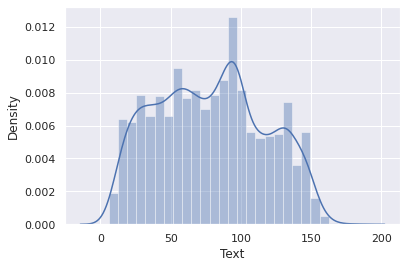

In [26]:
## Length of the Text using KDEplot
length = stock_data["Text"].str.len()
sns.distplot(length)
plt.show()

# Example of stopwords

In [27]:
## Checking for stopwords
stopwordSet = set(stopwords.words("english"))
stopwordSet

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Processing

In [28]:
## NlP Processing
lemma = WordNetLemmatizer()

In [29]:
def cleanup_sentances(sentence):
    text = re.sub('[^a-zA-Z]'," ", sentence) # Removing non a-z characters
    print(sentence) # Print out non-cleaned text
    text = text.lower() # Lowering all text
    text = word_tokenize(text, language="english") # Splitting each word into an element of a list
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet] # Lemmatizing words and removing stopwords
    text = " ".join(text) # Putting words back into a single string. ['the', 'brown', 'cow'] --> 'the brown cow'
    print(text, '\n') # Print out cleaned text
    return text

In [30]:
# apply function on pandas Text feature
stock_data['text_cleaned'] = stock_data.Text.apply(cleanup_sentances)
stock_data.head()

Streaming output truncated to the last 5000 lines.

SAT like it over 2.75, needs vol
sat like need vol 

AAP stream is for sharing ideas not attacks! earn from each other not direct attacks. OK to have fun but there's a limit to it. Bearish!
aap stream sharing idea attack earn direct attack ok fun limit bearish 

Covering half +2.00 user: Short 828.30 GOOG 350 shares
covering half user short goog share 

BIOS taking some off here
bios taking 

  We explain in the Jan 24th aapl video how not to be gaffed by the operators,...fish hooks...aapl might be great co , but broken sto
explain jan th aapl video gaffed operator fish hook aapl might great co broken sto 

AAP BTO 430 Puts
aap bto put 

user: my year tgt is 270 next year 60 That is funny because unless AAP raises their div, their cash balance will be 200B 2014
user year tgt next year funny unless aap raise div cash balance b 

MOS doing great for me last few days.. is it time to sell?
mo great last day time sell 

OCZ trying to find 

,Text,Sentiment,text_cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user aap movie return fea geed indicator trade...
2,user I'd be afraid to short AMZN - they are lo...,1,user afraid short amzn looking like near monop...
3,MNTA Over 12.00,1,mnta
4,OI Over 21.37,1,oi


In [31]:
#cleaned up data
stock_data.head()

,Text,Sentiment,text_cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user aap movie return fea geed indicator trade...
2,user I'd be afraid to short AMZN - they are lo...,1,user afraid short amzn looking like near monop...
3,MNTA Over 12.00,1,mnta
4,OI Over 21.37,1,oi


In [32]:
## Create the (B.O.W) bag of word model
# max number of columns to limit matrix columns 
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(stock_data.text_cleaned).toarray()

In [33]:
# each column now serves as a feature
pd.DataFrame(X, columns=cv.get_feature_names()).head(100)

,aa,aap,aapl,able,abt,abx,acad,account,accounting,accumulation,accurate,aci,acquisition,across,act,acting,action,activity,actually,acx,ad,adar,adbe,add,added,adding,addition,adm,advanced,advisor,aee,aeg,af,affect,affy,afternoon,ag,ago,agree,ah,...,wow,wpi,wrap,wrong,wsj,wsjheard,wt,wynn,xco,xf,xk,xom,xone,xt,xv,xx,xxia,ya,year,yep,yes,yest,yesterday,yet,yhoo,yield,ym,yoy,yr,ytd,zagg,zb,zcs,zgnx,zion,ziop,znga,zone,zoom,zot
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
y= stock_data['Sentiment']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.2, random_state = 0)

# Logistic regression

In [35]:
## Logistic Regression
model = LogisticRegression() # Instantiating the model 
model.fit(X_train, y_train) # Fitting the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
Y_pred = model.predict(X_valid) # producing predictions on the validation dataset

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred) # Producing false and true positive rates at different thresholds
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.7346788272831257
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       339
           1       0.80      0.85      0.82       588

    accuracy                           0.76       927
   macro avg       0.75      0.73      0.74       927
weighted avg       0.76      0.76      0.76       927

[[211 128]
 [ 90 498]]


# Random Forest

In [38]:
## Random Forest
model = RandomForestClassifier()

In [39]:
model.fit(X_train, y_train)
Y_pred = model.predict(X_valid)
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))

AUC:  0.7319171031244357
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       339
           1       0.81      0.79      0.80       588

    accuracy                           0.75       927
   macro avg       0.73      0.73      0.73       927
weighted avg       0.75      0.75      0.75       927



In [40]:
print(confusion_matrix(y_valid, Y_pred))

[[227 112]
 [121 467]]


# Naive Bayes

In [41]:
## Naives baye multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_valid)

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, Y_pred)
print('AUC: ', metrics.auc(fpr, tpr))
print(classification_report(y_valid, Y_pred))
print(confusion_matrix(y_valid, Y_pred))

AUC:  0.7175139967491422
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       339
           1       0.80      0.78      0.79       588

    accuracy                           0.73       927
   macro avg       0.71      0.72      0.72       927
weighted avg       0.74      0.73      0.73       927

[[223 116]
 [131 457]]
